# Lawyers and economists birth distribution on data.bnf

In [7]:
from SPARQLWrapper import SPARQLWrapper, SPARQLWrapper2, JSON, TURTLE, XML, RDFXML
import pprint
import csv
# from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import numpy as np 
from collections import Counter
from operator import itemgetter

In [8]:
query = """

PREFIX  egr:  <http://rdvocab.info/ElementsGr2/>
PREFIX foaf: <http://xmlns.com/foaf/0.1/>
PREFIX skos: <http://www.w3.org/2004/02/skos/core#>

SELECT DISTINCT  ?s ?name ?prefLabel ?year ?bio ?pb
WHERE
  { {


    { SELECT DISTINCT  ?s ?bio
        WHERE
          {   { ?s egr:biographicalInformation ?bio
                FILTER ( CONTAINS(?bio, "Juris") || CONTAINS(?bio, "Juriste") )
              }
            UNION
              { ?s egr:biographicalInformation ?bio
                FILTER ( CONTAINS(?bio, "Economiste") || CONTAINS(?bio, "Eco") )
              }
          }
      }
      ?s egr:dateOfBirth ?bd

    OPTIONAL {?s egr:placeOfBirth ?pb}
    OPTIONAL {?s foaf:name ?name}
    OPTIONAL {?s skos:prefLabel ?prefLabel}
    }
    BIND(STRBEFORE(STRAFTER(STR(?bd), "http://data.bnf.fr/date/"), "/") AS ?year)
    FILTER ( ?year > "1800" )
  }

ORDER BY ?year
"""

In [9]:
sparql = SPARQLWrapper("https://data.bnf.fr/sparql") 

In [10]:
sparql.setQuery(query)
sparql.setReturnFormat(JSON)

In [11]:
rc = sparql.queryAndConvert()
type(rc)

dict

**Analyse of the result**

In [12]:
# Number of rows in the result
len(rc['results']['bindings'])

3428

In [13]:
# Inspect the first three rows
i = 0
for l in rc['results']['bindings']:
    if i < 3:
        print(l)
        i += 1

{'s': {'type': 'uri', 'value': 'http://data.bnf.fr/ark:/12148/cb12121970x#about'}, 'name': {'type': 'literal', 'value': 'Alphonse Grün'}, 'year': {'type': 'literal', 'value': '1801'}, 'bio': {'type': 'literal', 'value': 'Juriste et journaliste'}, 'pb': {'type': 'literal', 'value': 'Strabourg'}}
{'s': {'type': 'uri', 'value': 'http://data.bnf.fr/ark:/12148/cb12962174j#about'}, 'name': {'type': 'literal', 'value': 'János Fogarasi'}, 'year': {'type': 'literal', 'value': '1801'}, 'bio': {'type': 'literal', 'value': 'Linguiste. - Juriste. - Académicien'}, 'pb': {'type': 'literal', 'value': 'Felsőkázsmárk, Hongrie'}}
{'s': {'type': 'uri', 'value': 'http://data.bnf.fr/ark:/12148/cb112784662#about'}, 'name': {'type': 'literal', 'value': 'Josef Josefovič Jungmann'}, 'year': {'type': 'literal', 'value': '1801'}, 'bio': {'type': 'literal', 'value': "Juriste et théoricien de la traduction. - Traducteur du romancier Karl Franz Van der Velde (1779-1824), des librettistes Christian Friedrich Bretzner

In [14]:
# Extract the values from the first five rows
i = 0
for l in rc['results']['bindings']:
    if i < 5:
        try: 
            name = l['name']['value']
            print([l['s']['value'],name,l['year']['value'],l['bio']['value']])
        except :
            try: 
                name = l['prefLabel']['value']
                print([l['s']['value'],name,l['year']['value'],l['bio']['value']])
            except :
                print([l['s']['value'],'',l['year']['value'],l['bio']['value']])

        i += 1

['http://data.bnf.fr/ark:/12148/cb12121970x#about', 'Alphonse Grün', '1801', 'Juriste et journaliste']
['http://data.bnf.fr/ark:/12148/cb12962174j#about', 'János Fogarasi', '1801', 'Linguiste. - Juriste. - Académicien']
['http://data.bnf.fr/ark:/12148/cb112784662#about', 'Josef Josefovič Jungmann', '1801', "Juriste et théoricien de la traduction. - Traducteur du romancier Karl Franz Van der Velde (1779-1824), des librettistes Christian Friedrich Bretzner (1748-1807) et Johann Gottlieb Stephanie le Jeune (1741-1800). - Meurt de la tuberculose. - Fils de l'écrivain Josef Jungmann (1773-1847)"]
['http://data.bnf.fr/ark:/12148/cb13204913q#about', 'Achille-François Le Sellyer', '1801', "Jurisconsulte. - Avocat à la Cour d'Amiens"]
['http://data.bnf.fr/ark:/12148/cb125042402#about', 'John Barnard Byles', '1801', 'Juriste. - Spécialiste du droit commercial']


In [28]:
with open('sparql_bnf_1.csv', 'w', newline='') as csvfile:
    document = csv.writer(csvfile, delimiter='|',
                            quotechar='"', quoting=csv.QUOTE_MINIMAL)
    for l in rc['results']['bindings']:
        try: 
            name = l['name']['value']
            document.writerow([l['s']['value'],name,l['year']['value'],l['bio']['value']])
        except :
            try: 
                name = l['prefLabel']['value']
                document.writerow([l['s']['value'],name,l['year']['value'],l['bio']['value']])
            except :
                document.writerow([l['s']['value'],'',l['year']['value'],l['bio']['value']])


### Inspects years of birth and count the number of births per year

In [16]:
# Explore
yearsList = []
for l in rc['results']['bindings']:
    yearsList.append(l['year']['value'])

In [17]:
min(yearsList), max(yearsList)

('1801', '1972')

In [18]:
yearsList.sort()

In [19]:
# Count births per year
counterYearsList = Counter(yearsList)
groupedYearsList = list(zip(counterYearsList.keys(), counterYearsList.values()))

In [20]:
groupedYearsList[:20]

[('1801', 7),
 ('1802', 13),
 ('1803', 16),
 ('1804', 12),
 ('1805', 13),
 ('1806', 12),
 ('1807', 10),
 ('1808', 22),
 ('1809', 17),
 ('1810', 14),
 ('1811', 11),
 ('1812', 11),
 ('1813', 12),
 ('1814', 9),
 ('1815', 16),
 ('1816', 20),
 ('1817', 20),
 ('1818', 12),
 ('1819', 14),
 ('1820', 11)]

In [21]:
# Transform years from string to integer
groupedYearsList = [[int(i[0]), i[1]] for i in groupedYearsList]
groupedYearsList[:5]

[[1801, 7], [1802, 13], [1803, 16], [1804, 12], [1805, 13]]

In [22]:
### Create a list of five years period, i.e. the list of the first year of each period
d_list = []
period = 5
d_start = 1800
d_list.append(d_start)

i = 0
while i < 35:
    d_start = d_start + period
    d_list.append(d_start)
    i += 1

In [23]:
print(d_list[:2])
min(d_list), max(d_list)

[1800, 1805]


(1800, 1975)

In [24]:
### Births distribution per year and per five year period

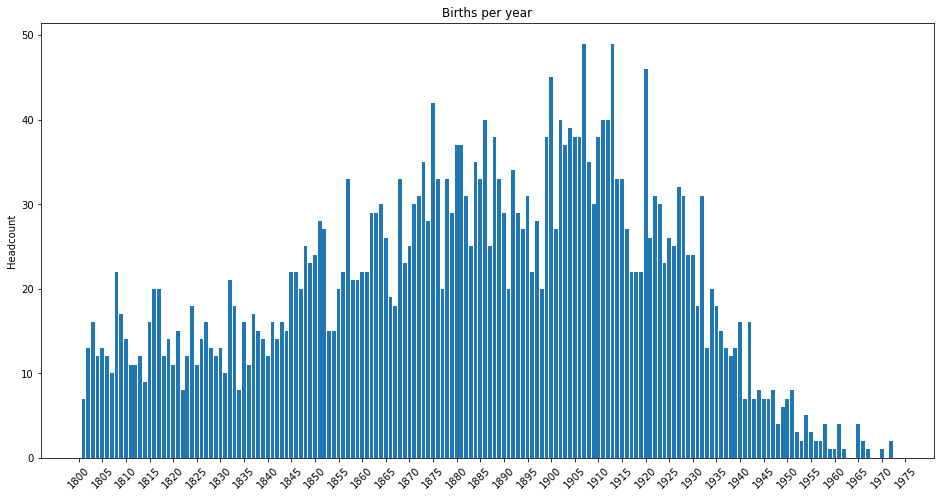

In [25]:
# Distribution per year
objects = [l[0] for l in groupedYearsList]
eff = [l[1] for l in groupedYearsList]

p1 = plt.bar(objects, eff)

plt.xticks(d_list)
plt.ylabel('Headcount')
plt.title('Births per year')
plt.gcf().set_size_inches(16, 8)
plt.xticks(rotation=45)
plt.show()


In [26]:
# Grouping per five year period
i_list = []
for i in d_list:
    i_n = 0
    for l in groupedYearsList:
        if l[0] >= i and l[0] < (i + 5):
            i_n = i_n + l[1]
    i_list.append([i, i_n])        

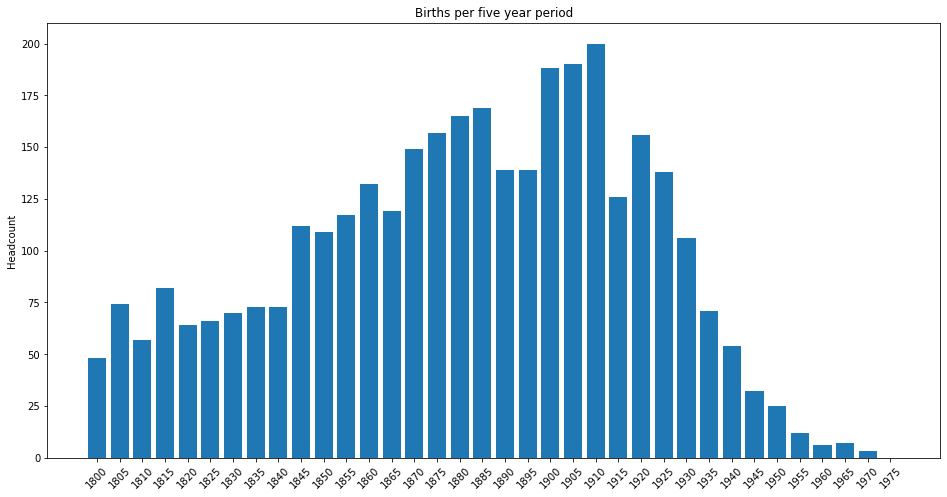

In [27]:
# Distribution per 5-year period

objects = [str(l[0]) for l in i_list]
eff = [l[1] for l in i_list]

p1 = plt.bar(objects, eff)

plt.ylabel('Headcount')
plt.title('Births per five year period')
plt.gcf().set_size_inches(16, 8)

plt.xticks(rotation=45)
plt.show()
